In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import bs4
from bs4 import BeautifulSoup
%matplotlib inline


def get_text(url):
    # Get the html page by using "request.get" function
     try:
        # Set cookies to the local (US), avoid the language transform into others.
        r = requests.get(url, timeout=30, cookies={'customLocale': 'en_US'})
        return r.text
     except Exception as error:
        print(error)

def get_hero_information(hlist, html, position):
    """
    position: TOP JUNGLE MID ADC SUPPORT
    """
    
    # Parse the html page by using BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")
    
    # Loop the table
    for tr in soup.find(name="tbody", attrs="tabItem champion-trend-tier-{}".format(position)).children:
        if isinstance(tr, bs4.element.Tag):
            tds = tr('td')
            heroName = tds[3].find(attrs="champion-index-table__name").string
            winRate = tds[4].string
            pickRate = tds[5].string
            lane = position
            hlist.append([heroName, winRate, pickRate, lane])
    return hlist

def get_heros_dataframe():
    position = ["TOP", "JUNGLE", "MID", "ADC", "SUPPORT"]
    # Establish five empty dataframes
    df = {name: pd.DataFrame() for name in position}
    # Concatenate all the five dataframes to one dataframe
    hero_df = pd.DataFrame()
    for name, df in df.items():
        url = "http://na.op.gg/champion/statistics"
        hlist = []
        html = get_text(url)
        hlist = get_hero_information(hlist, html, name)
        df = pd.DataFrame(hlist)
        df.columns = ["hero_name", "win_rate", "pick_rate", "lane"]
        hero_df = pd.concat([hero_df, df])
    hero_df.reset_index(drop=True)
    return hero_df

In [10]:
hero_df = get_heros_dataframe()

In [11]:
def hero_df_preprocessing(hero_df):
    # Change every element in dataframe into string
    hero_df["hero_name"] = hero_df["hero_name"].map(str)
    hero_df["win_rate"] = hero_df["win_rate"].map(str)
    hero_df["pick_rate"] = hero_df["pick_rate"].map(str)
    hero_df["lane"] = hero_df["lane"].map(str)

    # Data pre-processing
    hero_df["win_rate"] = hero_df["win_rate"].map(lambda x: x.split("%")[0])
    hero_df["pick_rate"] = hero_df["pick_rate"].map(lambda x: x.split("%")[0])
    hero_df["win_rate"] = hero_df["win_rate"].map(lambda x: float(x)/100)
    hero_df["pick_rate"] = hero_df["pick_rate"].map(lambda x: float(x)/100)
    
    return hero_df

In [12]:
hero_df = hero_df_preprocessing(hero_df)

In [13]:
def visualise_heros_wr_and_pr(hero_df):
    plt.style.use('ggplot')
    plt.figure(figsize=(20, 8))
    plt.subplot(1,2,1)
    hero_df["win_rate"].plot(kind="hist", color="tab:blue", title="win rate")
    plt.subplot(1,2,2)
    hero_df["pick_rate"].plot(kind="hist", color="tab:blue", title="pick rate")

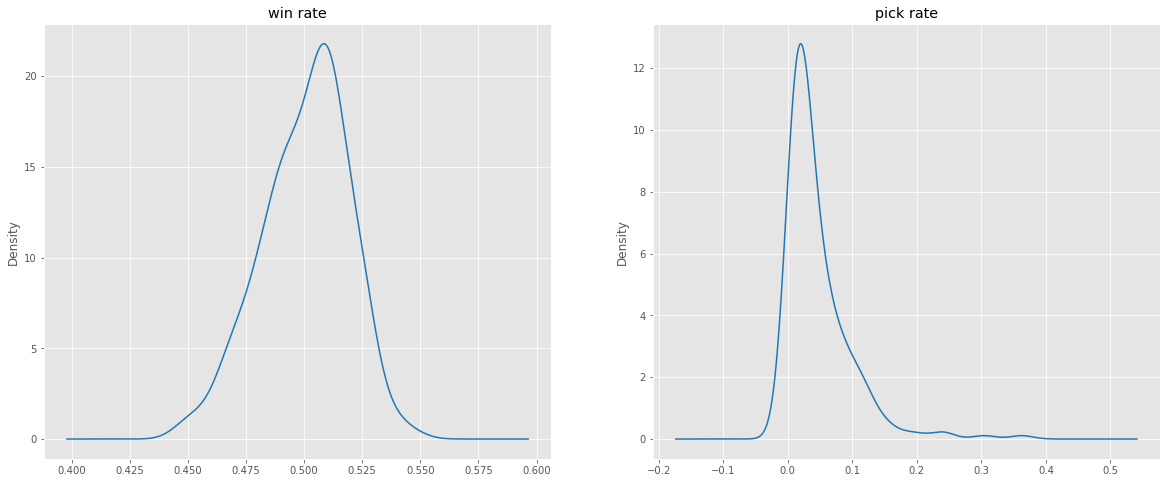

In [14]:
visualise_heros_wr_and_pr(hero_df)

In [16]:
hero_df.sample(5)

,hero_name,win_rate,pick_rate,lane
7,Mordekaiser,0.4978,0.1100,TOP
10,Vladimir,0.5143,0.0474,MID
25,Hecarim,0.5088,0.0192,JUNGLE
19,Zyra,0.5142,0.0207,SUPPORT
18,Sett,0.4794,0.0885,SUPPORT
